In [25]:
from math import pi

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

In [26]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Permite mejor calidad en las imágenes generadas.

In [27]:
q = QuantumRegister(2, name='q')

### Controlled Pauli Gates

#### Controlled-X (or, controlled-NOT) gate
The controlled-not gate flips the `target` qubit when the control qubit is in the state $\left|1\right\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$



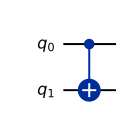

In [28]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])

qc.draw('mpl')

In [29]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="\\text{$CX$ = $CNOT$ = }\n")

<IPython.core.display.Latex object>

#### Controlled $Y$ gate

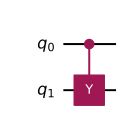

In [30]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])

qc.draw('mpl')

In [31]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{$CY$ = }\n")

<IPython.core.display.Latex object>

#### Controlled $Z$ (or, controlled Phase) gate

Similarly, the controlled Z gate flips the phase of the target qubit if the control qubit is $\left|1\right\rangle$. The matrix looks the same regardless of whether the MSB or LSB is the control qubit.

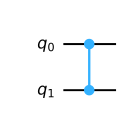

In [32]:
qc = QuantumCircuit(q)
qc.cz(0,1)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='CZgate.png')

In [33]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{$CZ$ = }\n")

<IPython.core.display.Latex object>

### Controlled Hadamard gate

Apply $H$ gate to the target qubit if the control qubit is $\left|1\right\rangle$. Below is the case where the control is the LSB qubit.

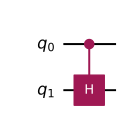

In [34]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])

qc.draw('mpl')

In [35]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{$CH$ = }\n")

<IPython.core.display.Latex object>

### Controlled rotation gates

#### Controlled rotation around Z-axis

Perform rotation around Z-axis on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$.

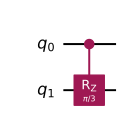

In [36]:
qc = QuantumCircuit(q)
theta = pi/3
qc.crz(theta,0,1)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='CRZ.png')

In [37]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{$C_{RZ}(\\pi/3)$ = }\n")

<IPython.core.display.Latex object>

### Controlled phase rotation

Perform a phase rotation if both qubits are in the $\left|11\right\rangle$ state. The matrix looks the same regardless of whether the MSB or LSB is the control qubit.

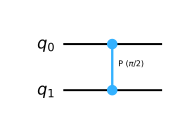

In [38]:
qc = QuantumCircuit(q)
qc.cp(pi/2,q[0], q[1])

qc.draw('mpl')

In [39]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{$CP(\\pi/2)$ = }\n")

<IPython.core.display.Latex object>

### Controlled-$U$ rotation:

Perform controlled-$U$ rotation on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$. 

$$
C_{U}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

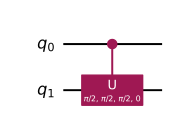

In [40]:
qc = QuantumCircuit(q)
qc.cu(pi/2, pi/2, pi/2, 0, q[0], q[1])

qc.draw('mpl')

In [41]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{$CU(\\pi/2, \\pi/2, \\pi/2, 0)$ = }\n")

<IPython.core.display.Latex object>

### SWAP gate

The SWAP gate exchanges the two qubits. It transforms the basis vectors as

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle$$


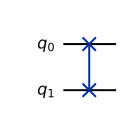

In [42]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])

qc.draw('mpl')

In [43]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\textit{SWAP = }\n")

<IPython.core.display.Latex object>

## Three-qubit gates <a name="three_gates"/>


There are two commonly-used three-qubit gates. For three qubits, the basis vectors are ordered as

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

which, as bitstrings, represent the integers $0,1,2,\cdots, 7$. Again, Qiskit uses a representation in which the first qubit is on the right-most side of the tensor product and the third qubit is on the left-most side:

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Toffoli gate ($ccx$ gate)

The [Toffoli gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) flips the third qubit if the first two qubits (LSB) are both $\left|1\right\rangle$:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

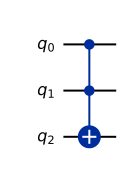

In [44]:
q = QuantumRegister(3, name='q')

qc = QuantumCircuit(q)
qc.ccx(0, 1, 2)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Toffoli.png')

In [45]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\textit{Toffoli = }\n")

<IPython.core.display.Latex object>

### Controlled swap gate (Fredkin Gate)

The [Fredkin gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate), or the *controlled swap gate*, exchanges the second and third qubits if the first qubit (LSB) is $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

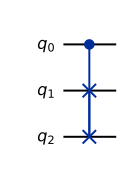

In [46]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])

qc.draw('mpl')

In [47]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\textit{CSWAP = }\n")

<IPython.core.display.Latex object>

In [48]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version
from IPython.display import display, Math
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 1.3.2
IBM RunTime Version: 0.35.0
Qiskit_Aer Version: 0.16.1
Python Version: 3.13.1
2025 ©
